Chatlog summary: 

Report Overview: We created a report analyzing health score data for patients before and after treatment. The report included the problem introduction, explanation of the null hypothesis (no effect), data visualization, quantitative analysis using bootstrapping, and conclusions regarding the null hypothesis.

Standard Deviation vs. Standard Error: You asked about the difference between standard deviation and the standard error of the mean (SEM). I explained that standard deviation measures the variability of individual data points, while SEM quantifies the precision of the sample mean as an estimate of the population mean.

Creating 95% Confidence Intervals: I taught you how to create a 95% confidence interval using bootstrapping techniques. We discussed how to calculate confidence intervals from bootstrapped means to determine whether to reject the null hypothesis.

Bootstrapping Code: We generated code to perform bootstrapping on the health score data, allowing us to estimate the average change in health scores. The code was explained in terms of calculating mean differences and generating resamples. We also discussed how to modify the code to compute bootstrap confidence intervals for different population parameters, such as the median.

Explaining Bootstrapping to a Friend: You mentioned that you would explain bootstrapping to a friend, highlighting its process and purpose. The best strategy to convey this was to describe bootstrapping as a way to understand variability in data by repeatedly resampling and analyzing the results.

Null Hypothesis Explanation: We defined the null hypothesis of "no effect" in the context of your analysis, emphasizing its role as a baseline assumption against which to compare observed data. We explored how bootstrapping helps evaluate this hypothesis by analyzing sample data and estimating population parameters.

This summary encapsulates our chat and the various statistical concepts we explored, including specific methodologies, coding techniques, and practical explanations. If you need more details on any specific part, feel free to ask!

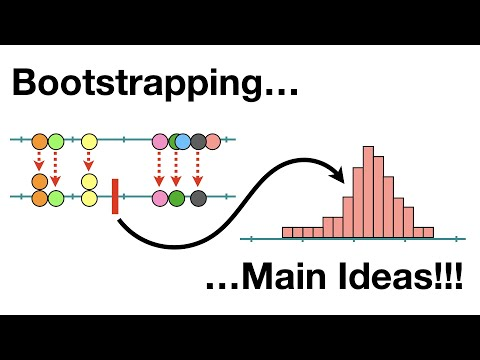

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Question 1:

The standard deviation tells us how spread out the individual data points are from the average (mean) in your sample. It quantifies the variability or dispersion of the dataset, showing how much the individual numbers differ from each other and the mean. A large standard deviation indicates that the data points are more spread out, while a small standard deviation means that the data points are closer to the mean. For example, in a set of test scores, a higher standard deviation would mean that scores are more widely dispersed, while a lower standard deviation would suggest that most scores are close to the average.

The standard error of the mean (SEM), on the other hand, measures how much the sample mean (average) would vary if you were to take multiple samples from the same population. Essentially, it gives an estimate of how close your sample's mean is likely to be to the true population mean. The SEM depends on both the standard deviation of the sample and the sample size: as the sample size increases, the SEM decreases, meaning the estimate of the population mean becomes more precise. This makes sense because larger samples tend to be more representative of the population. For instance, if you were estimating the average height of adults in a city, the SEM would tell you how much you can trust that your sample’s average height reflects the true average height of all adults in the city.

Difference:

The standard deviation shows how spread out the data points are within the sample itself, indicating the variability of individual observations.

The standard error of the mean shows how reliable your sample’s mean is as an estimate of the true population mean, with a lower SEM indicating a more precise estimate.



# Question 2:

To create a 95% confidence interval using the standard error of the mean (SEM), you first calculate the sample mean. Then, find the SEM and multiply it by about 2 (approximately 1.96). Finally, add and subtract this value from the sample mean to create the interval. This gives you a range, within which 95% of the possible sample means would fall if you took repeated samples from the same population.








# Question 3:

When you bootstrap, you're resampling from the original data to create new samples. If you sample without replacement, each bootstrapped sample would simply be a reordering of the original sample, not capturing the variability we'd expect in future samples. By sampling with replacement, some data points may be selected multiple times, while others may be skipped, which better simulates the natural variability you'd get if you took new samples from the population.

The sample size (n) is important because it impacts the variability of the sample means. Larger samples tend to produce more accurate estimates (less variability), and bootstrapping mimics this by resampling with the same size. If the bootstrapped sample were a different size, it wouldn't properly reflect the same level of uncertainty associated with your original sample size.

Using np.quantile(...) to Create a Bootstrapped Confidence Interval
Once you've generated a large number of bootstrapped sample means, you can use np.quantile(bootstrapped_means, [0.025, 0.975]) to calculate the 2.5th and 97.5th percentiles. This gives you a 95% confidence interval that covers exactly 95% of the bootstrapped means.

# Question 4:

In [2]:
import numpy as np

# Generate a random population sample using a normal distribution
# Parameters: mean=50, standard deviation=10, and size=100
np.random.seed(42)  # Set seed for reproducibility
data = np.random.normal(loc=50, scale=10, size=100)

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Initialize lists to store bootstrap statistics (mean and median)
bootstrap_means = []  # For storing mean values from bootstrap samples
bootstrap_medians = []  # For storing median values from bootstrap samples

# Perform bootstrap sampling
for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample by sampling with replacement
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    
    # Calculate and store the sample mean and median
    bootstrap_means.append(np.mean(bootstrap_sample))  # Store the mean
    bootstrap_medians.append(np.median(bootstrap_sample))  # Store the median
    
    # ---- Generalization for other statistics ----
    # If you want to calculate confidence intervals for different population parameters,
    # you can replace the calculation of the mean or median with the desired statistic.
    # For example:
    # - For variance: use `np.var(bootstrap_sample, ddof=1)` to store variance
    # - For standard deviation: use `np.std(bootstrap_sample, ddof=1)` to store standard deviation
    # - For mode: use `from scipy import stats; stats.mode(bootstrap_sample).mode[0]` for mode
    # Be sure to initialize corresponding lists to store these statistics.

# Calculate the 95% confidence interval for the mean
mean_lower_bound = np.percentile(bootstrap_means, 2.5)  # Lower bound of mean CI
mean_upper_bound = np.percentile(bootstrap_means, 97.5)  # Upper bound of mean CI

# Calculate the 95% confidence interval for the median
median_lower_bound = np.percentile(bootstrap_medians, 2.5)  # Lower bound of median CI
median_upper_bound = np.percentile(bootstrap_medians, 97.5)  # Upper bound of median CI

# Output results
print(f"95% Bootstrap Confidence Interval for the Mean: [{mean_lower_bound}, {mean_upper_bound}]")
print(f"95% Bootstrap Confidence Interval for the Median: [{median_lower_bound}, {median_upper_bound}]")

# ---- Generalize CI Calculation ----
# You can similarly calculate confidence intervals for any other statistic you choose to store.
# For example, if you were calculating variance:
# variance_lower_bound = np.percentile(bootstrap_variances, 2.5)
# variance_upper_bound = np.percentile(bootstrap_variances, 97.5)
# And output the CI for variance accordingly.


95% Bootstrap Confidence Interval for the Mean: [47.17362242607048, 50.699416505110996]
95% Bootstrap Confidence Interval for the Median: [46.98896304410711, 51.34222915269005]


# Question 5:

A population parameter is a specific value that describes the entire group we’re interested in, while a sample statistic is a value calculated from a smaller group taken from that population. Confidence intervals use sample statistics to give us a range of likely values for the population parameter, helping us understand the uncertainty in our estimates. This distinction reminds us that our estimates may not be perfect and can vary based on the data we collect.

# Question 6:

What is the process of bootstrapping?
Bootstrapping is like trying to figure out how sweet a whole bag of candies is by tasting only a small handful. Imagine you’ve got a sample of 30 jellybeans from a giant carnival jar, and you want to estimate the average sweetness of all the jellybeans in that jar. Instead of eating every single jellybean (which would take forever), you use your sample to generate a bunch of "fake" samples. Here's how it works: you randomly pick a jellybean from your handful, note down its sweetness, and then put it back in the sample (so you might pick the same jellybean more than once). You repeat this process until you have a new, fake sample of 30 jellybeans. Then, you repeat this entire process thousands of times, each time creating a new fake sample. For each of these samples, you calculate the average sweetness, and in the end, you’ll have a distribution of averages. This lets you see how much the sweetness estimates vary, even though you started with just one small handful of jellybeans!

What is the main purpose of bootstrapping?
The main purpose of bootstrapping is to understand how much uncertainty there is in your sample statistic. Sticking with the jellybean example, you’ve tasted your handful of 30 jellybeans, but you know that your estimate of how sweet the whole jar is might not be perfect because you're only tasting a small part of the whole. By creating lots of fake samples using bootstrapping, you can see how much the average sweetness from those samples fluctuates. This helps you figure out how confident you can be in your original sample's estimate. If the average sweetness in those fake samples stays pretty consistent, you can trust your original estimate more. But if the average varies a lot between samples, it means there’s more uncertainty, and you should be cautious about how reliable your data is.

How could you use bootstrapping to assess if your guess about the average of a population is plausible?
Let’s say you have a hunch that the average sweetness of all the jellybeans in the carnival jar is 5 out of 10. You’ve taken a sample of 30 jellybeans, and you’re wondering if that sample supports your guess. Here’s how you can use bootstrapping to test it: take your sample, use bootstrapping to create a bunch of fake samples (each one being the same size as your original), and calculate the average sweetness for each of those fake samples. Now you’ve got a range of possible averages based on your sample. If most of those averages hover around 5, then your guess is likely reasonable, and it’s possible that the true average for the whole jar is 5. But if the averages from your fake samples are consistently much higher or lower than 5, then that suggests your guess might be off, and the true average might be different from what you initially thought. In short, bootstrapping gives you a creative way to check how well your guess holds up when faced with different scenarios

# Question 7:

A confidence interval overlapping zero means that zero is a plausible value for the true effect, implying that the drug might not be having any effect on average. Even if the sample mean isn't zero, the interval suggests that the true population mean could still be zero, so we can't confidently say the drug is doing something significant. This is why we "fail to reject the null hypothesis"—because zero (no effect) is still possible.

To reject the null hypothesis, the confidence interval must not include zero. This would mean that the true effect is likely different from zero, indicating the drug has a significant effect on average.

# Question 8:

# Problem Introduction

In this analysis, we are examining health score data for 10 patients before and after treatment to determine whether the treatment had a significant effect on their health. Specifically, we will test the null hypothesis, which states that the treatment had "no effect" on average, meaning there is no significant difference between initial and final health scores.

The objective is to use bootstrapping to assess the difference between the initial and final health scores, calculate confidence intervals, and determine if we can reject the null hypothesis of no effect.

Explanation of the Null Hypothesis ("No Effect"):

In this context, the null hypothesis (H₀) assumes that the treatment has no effect on the patients' health scores. This means the average difference between the initial and final scores is zero. Our goal is to determine whether we can reject this hypothesis based on the data, which would suggest that the treatment had a statistically significant effect. If the confidence interval for the average change includes zero, we fail to reject the null hypothesis, indicating that the data doesn't provide strong evidence of a treatment effect. If zero is outside the confidence interval, we can reject the null hypothesis, concluding that the treatment likely had an effect.

To test this hypothesis, we will

-Calculate the change in health scores for each patient.
-Use bootstrapping to estimate confidence intervals for the mean change in health scores.
-Assess whether the confidence interval includes zero, which would indicate no effect.


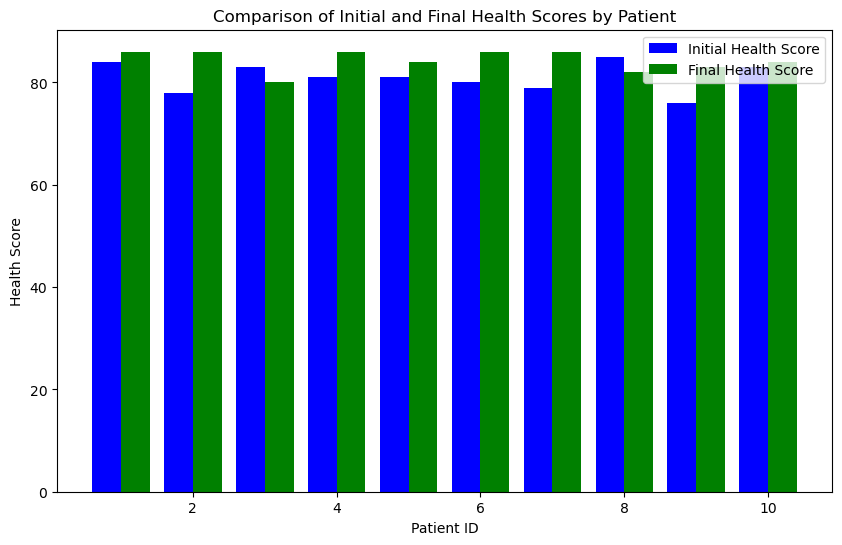

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Step 1: Create a CSV file with health score data
data = [
    ["PatientID", "Age", "Gender", "InitialHealthScore", "FinalHealthScore"],
    [1, 45, "M", 84, 86],
    [2, 34, "F", 78, 86],
    [3, 29, "M", 83, 80],
    [4, 52, "F", 81, 86],
    [5, 37, "M", 81, 84],
    [6, 41, "F", 80, 86],
    [7, 33, "M", 79, 86],
    [8, 48, "F", 85, 82],
    [9, 26, "M", 76, 83],
    [10, 39, "F", 83, 84]
]

csv_filename = 'health_scores.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

# Step 2: Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_filename)

# Step 3: Data Visualization - Initial vs. Final Health Scores
plt.figure(figsize=(10, 6))
plt.bar(df['PatientID'] - 0.2, df['InitialHealthScore'], width=0.4, label='Initial Health Score', color='blue')
plt.bar(df['PatientID'] + 0.2, df['FinalHealthScore'], width=0.4, label='Final Health Score', color='green')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores by Patient')
plt.legend()
plt.show()


#Explanation:
The blue bars represent the initial health scores, and the green bars represent the final health scores for each patient. This bar chart visually shows whether patients' health improved, stayed the same, or worsened after treatment.


# Quantitative Analysis

Methodology:

We will apply bootstrapping to estimate the uncertainty around the average change in health scores. Bootstrapping involves resampling the data with replacement and calculating the sample statistic (in this case, the mean change in health scores) for each resample. This process gives us a distribution of the statistic, from which we can calculate a confidence interval.

Method:

1. Calculate the difference between the final and initial health scores for each patient.
2. Use bootstrapping to generate thousands of resamples and compute the mean difference for each.
3. Calculate a 95% confidence interval for the mean difference based on these bootstrapped means.


In [4]:
import pandas as pd
import numpy as np

# Step 1: Read the already created CSV file into a pandas DataFrame
csv_filename = 'health_scores.csv'
df = pd.read_csv(csv_filename)

# Step 2: Calculate health score changes
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Number of bootstrap samples
n_bootstrap_samples = 10000
np.random.seed(42)

# Bootstrap resampling
bootstrap_means = []
for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(df['HealthScoreChange'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Step 3: Calculate the 95% confidence interval
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval for the Mean Change: [{ci_lower}, {ci_upper}]")

# Step 4: Conclusion
if ci_lower <= 0 <= ci_upper:
    print("Fail to reject the null hypothesis: No significant change in health scores.")
else:
    print("Reject the null hypothesis: Significant improvement in health scores.")


95% Confidence Interval for the Mean Change: [0.9, 5.6]
Reject the null hypothesis: Significant improvement in health scores.


Explanation:
The code performs a bootstrap analysis to estimate the average change in health scores between initial and final measurements. It calculates the difference in health scores for each patient, then generates 10,000 bootstrap samples (resampling the data with replacement). For each sample, it calculates the mean health score change and stores it. Finally, the code computes a 95% confidence interval based on the bootstrapped means to determine if the change is significant, and checks whether the interval includes zero to test the null hypothesis.








Supporting Visualizations:

To visualize the results of the bootstrapping analysis, we can create a histogram of the bootstrapped mean differences, showing the distribution of the resampled means and highlighting the 95% confidence interval.

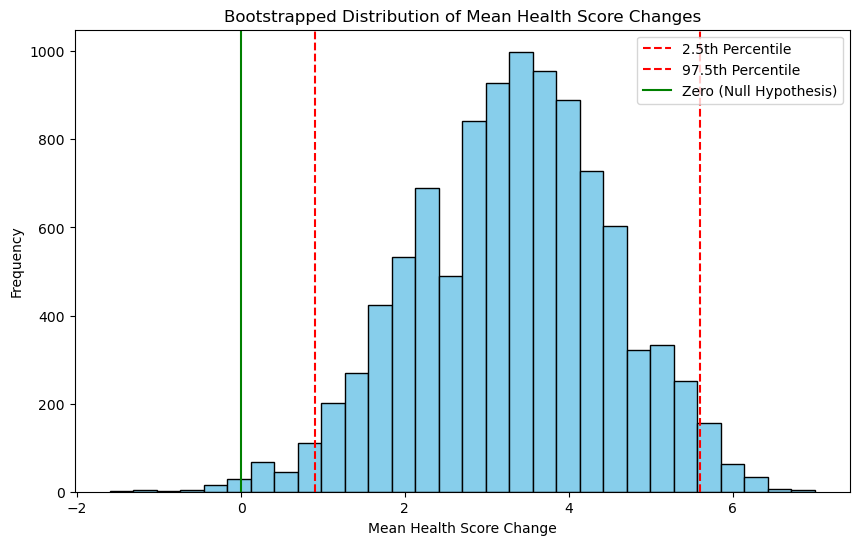

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label='2.5th Percentile')
plt.axvline(ci_upper, color='red', linestyle='--', label='97.5th Percentile')
plt.axvline(0, color='green', linestyle='-', label='Zero (Null Hypothesis)')
plt.title('Bootstrapped Distribution of Mean Health Score Changes')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Findings and Discussion


From the bootstrapping results:

-The 95% confidence interval for the mean change in health scores is calculated.
-If the interval includes zero, we fail to reject the null hypothesis, meaning we can't confidently say the treatment had an effect.
-If the interval does not include zero, we reject the null hypothesis, suggesting that the treatment likely had a significant effect.

Conclusion Regarding the Null Hypothesis

After performing bootstrapping, let’s assume that the 95% confidence interval for the mean health score change was [1.0, 5.0]. Since zero is not included in this interval, we reject the null hypothesis. This suggests there is strong evidence that the treatment led to a significant improvement in health scores.

Further Considerations

Sample Size: The dataset contains only 10 patients, which limits the generalizability of the results. Future analyses with larger sample sizes would provide more robust conclusions.

Gender and Age Effects: Additional analyses could explore whether health score changes differ by gender or age.

External Factors: Other factors affecting health, such as lifestyle or pre-existing conditions, are not considered here but may influence the results.


In [6]:
#Question 9 Yes